In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import glob
import tensorflow as tf
import note_seq

from pathlib import PurePath

import vxs
import vxs.utils as vxsu

In [2]:
generator = vxs.load_generator_from_bundle('../data/drum_kit_rnn.mag')

In [20]:
track = vxs.generate_track(generator, 32*8, temperature=1.2)

INFO:tensorflow:Beam search yields sequence with log-likelihood: -247.707916 


In [21]:
note_seq.plot_sequence(track)

Loading BokehJS ...

In [22]:
sound_track = vxs.Track(note_seq.fluidsynth(track, sample_rate=44100))

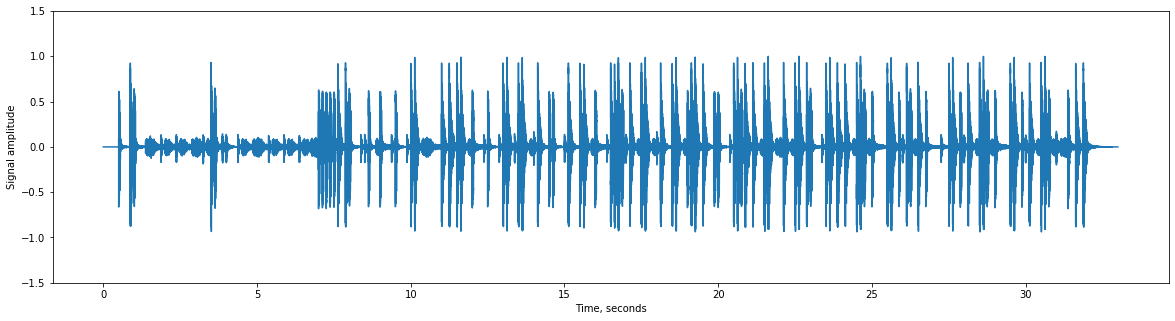

In [23]:
vxsu.plot_track(sound_track)

In [24]:
vxsu.play_audio(sound_track)